In [1]:
import numpy as np

def yhat(x, w):
    return np.sign(np.dot(x, w)) # o sign é a função de ativação do perceptron

In [2]:
npts = 100
X = np.random.rand(npts, 2)*6-3
labels = np.ones(X.shape[0], dtype=np.int)
labels[(X[:, 1]<X[:, 0])] = -1
X = np.c_[X, np.ones(X.shape[0])]

C:\Users\vinic\AppData\Local\Temp\ipykernel_9636\3701917810.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  labels = np.ones(X.shape[0], dtype=np.int)


In [3]:
# Inicializando os pesos
winit = np.random.randn(3)

In [4]:
w = winit
for i, j in zip(X, labels):
    w = w - (yhat(i, w) - j)*i

In [5]:
# Precisão do perceptron
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, [yhat(i, w) for i in X]))

0.93


In [6]:
# Melhorando a precisão através das epochs
for i, j in zip(X, labels):
    w = w - (yhat(i, w) - j)*i
    
print(accuracy_score(labels, [yhat(i, w) for i in X]))

1.0


In [7]:
# Refazendo o perceptron usando Keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='softsign'))
model.compile(SGD(), 'hinge')

In [15]:
# Função Softsign
import tensorflow as tf
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()
x = tf.placeholder(shape=[100,], dtype=tf.float32)
xi = np.linspace(-10, 10, 100)

with tf.Session() as s:
    y_ = (s.run(tf.nn.softsign(x), feed_dict={x:xi}))

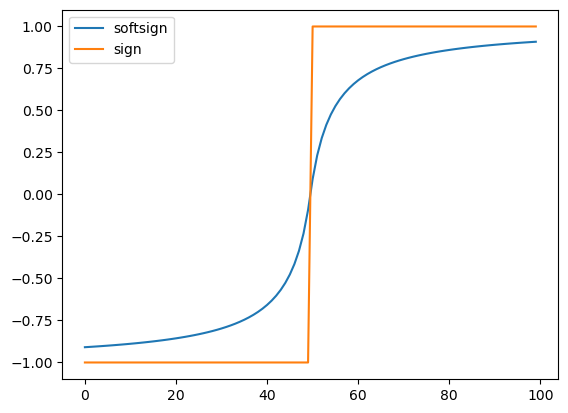

In [35]:
import matplotlib.pyplot as plt

sign_ = [np.sign(i) for i in xi]

plt.plot(y_)
plt.plot(sign_)
plt.legend(['softsign', 'sign'])

In [8]:
h = model.fit(X[:, :2], labels, epochs=300, verbose=0)

Text(0.5, 0, 'epochs')

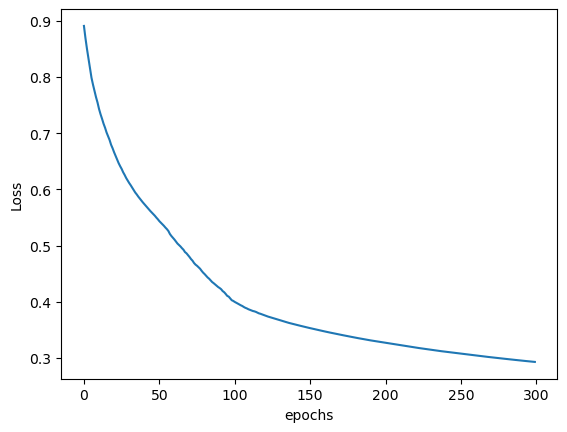

In [36]:
# Trajetória da Loss Function
import matplotlib.pyplot as plt

plt.plot(h.history['loss'])
plt.ylabel('Loss')
plt.xlabel('epochs')